In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv("D:\\Eda\\netflix_titles.csv")

In [3]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
 netflix.duplicated().sum()  # checking for duplicate rows

0

In [8]:
netflix.drop(['cast','date_added','duration'],axis =1 ,inplace =True) # dropping the columns conatining nan

In [9]:
netflix['director'].fillna('Not Known', inplace = True) # filling nan values in director column with not known

In [10]:
netflix['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [11]:
netflix['rating'].fillna('TV-MA', inplace = True) #filling nan values in rating  column with Tv-Ma

In [12]:
netflix['country'].mode()

0    United States
Name: country, dtype: object

In [13]:
netflix['country'].fillna('United States', inplace = True) #filling nan values in country column with USA

In [14]:
netflix.isnull().sum() # no nan values after the null value treatment

show_id         0
type            0
title           0
director        0
country         0
release_year    0
rating          0
listed_in       0
description     0
dtype: int64

In [15]:
# total number of shows present on netflix
total_titles = netflix['show_id'].count()
total_titles

8807

In [16]:
# total ratings of shows
total_ratings = netflix['rating'].nunique()
total_ratings

17

In [17]:
# total genres present
total_generes = netflix['listed_in'].nunique()
total_generes

514

In [18]:
# total directors present
total_directors = netflix['director'].nunique()
total_directors

4529

In [19]:
# when netflix started
minimum_date = netflix['release_year'].min()
minimum_date

1925

In [20]:
 # till the date shows are present
maximum_date = netflix['release_year'].max()
maximum_date

2021

In [77]:
# total ratings according to shows
show_ratings = netflix['rating'].value_counts()  # can be done using groupby
show_ratings

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

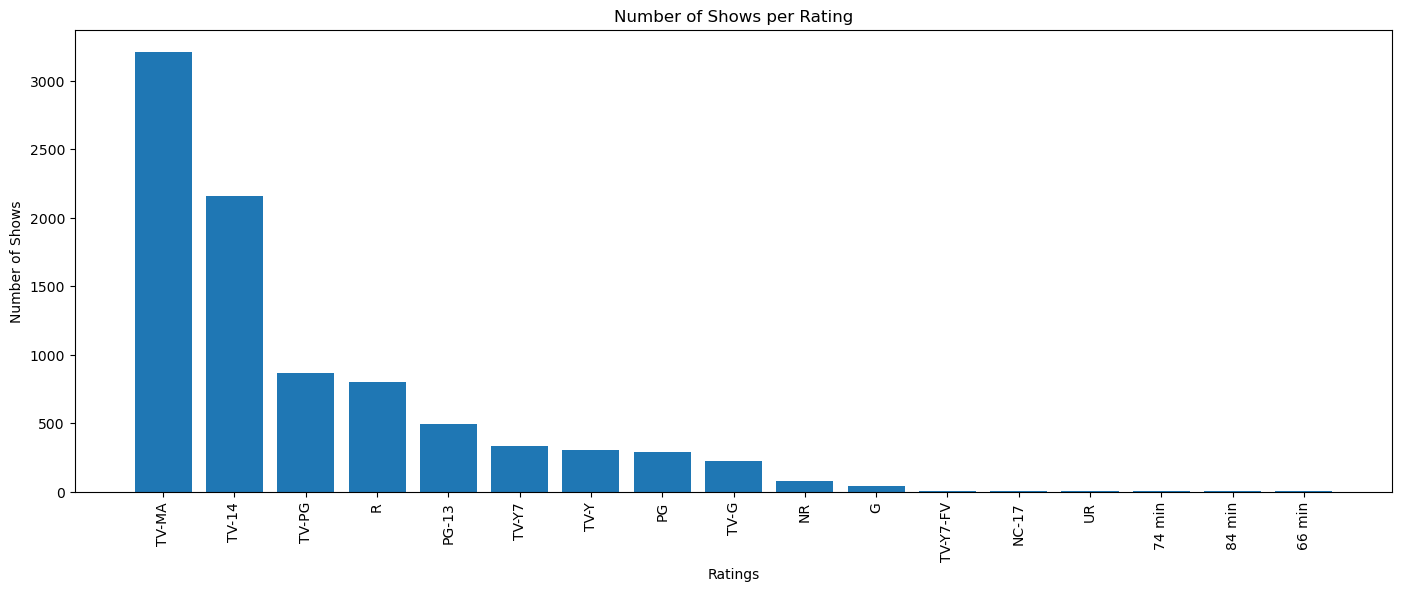

In [80]:
plt.figure(figsize=(17, 6))
bars = plt.bar(show_ratings.index, show_ratings.values)
plt.xlabel('Ratings')
plt.ylabel('Number of Shows')
plt.title('Number of Shows per Rating')
plt.xticks(rotation=90)

# Add labels to the x-axis
plt.xticks(show_ratings.index, show_ratings.index)

plt.show()


In [79]:
# Total Shows by Country
shows_country =netflix['country'].value_counts()
shows_country.head(5)

United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

In [58]:
# Total number of movies and tv shows
netflix['type'].value_counts() # can be done using groupby

Movie      6131
TV Show    2676
Name: type, dtype: int64

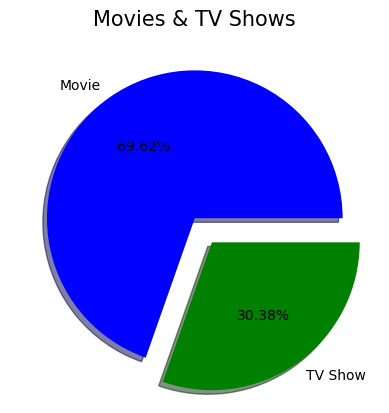

In [61]:
# Pie chart for total movies and tv shows
netflix_type = ['Movie', 'TV Show']
netflix_value = [6131, 2676]
colors = ['b', 'g']
explode = [0, 0.2]

plt.pie(netflix_value, colors=colors, labels=netflix_type, explode=explode, autopct='%1.2f%%', shadow=True)
plt.title('Movies & TV Shows', fontsize=15)
plt.show()



In [94]:
# Total Shows By Release Year
shows_release = netflix['release_year'].value_counts().sort_index()
shows_release

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

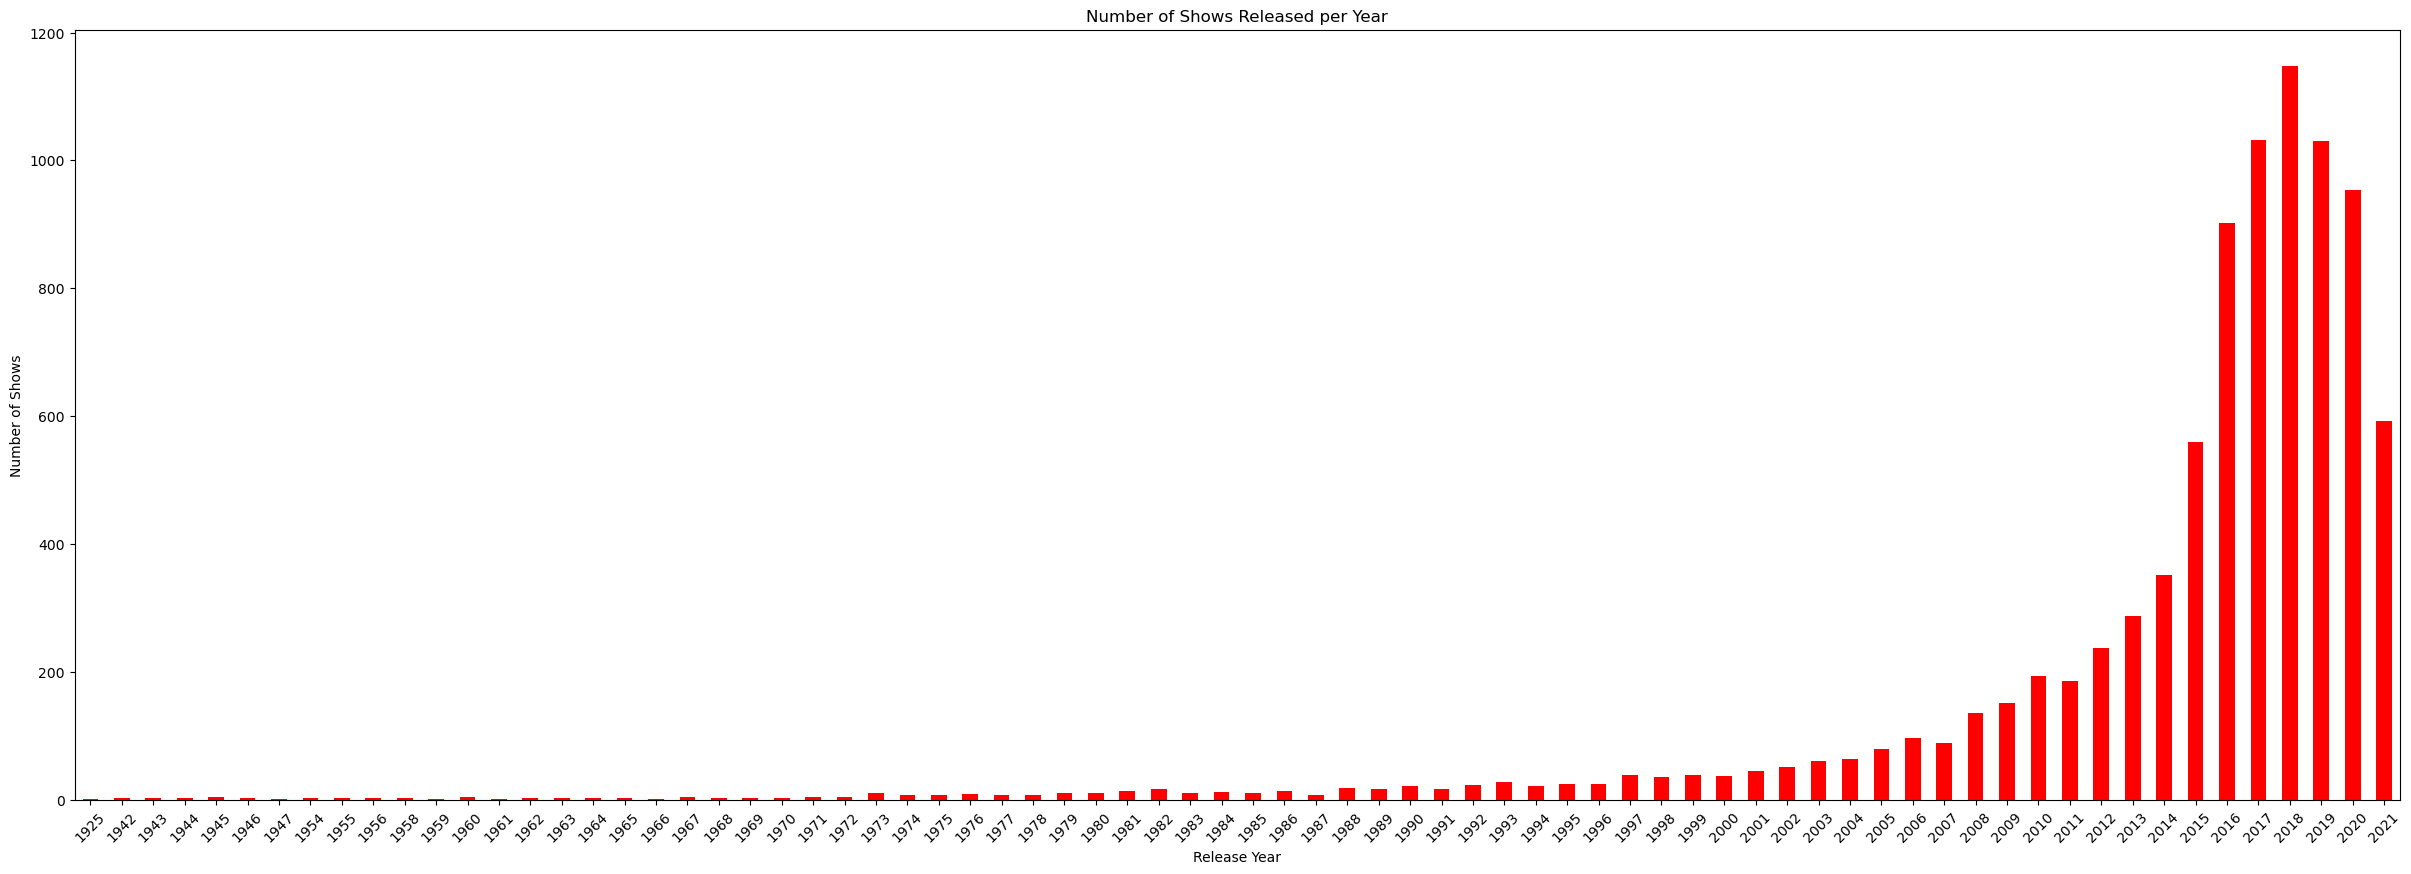

In [98]:
#  Bar Graph Showing Total Shows By Release Year 
plt.figure(figsize=(30, 10))
shows_release.plot(kind='bar', color='red')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released per Year')
plt.xticks(rotation=45)
plt.show()
